# Visualization of generated .tif Copernicus Hub L1c patches
This notebook visualizes the bands of a generated .tif L1C patches of Copernicus Hub that were shifted and cropped to make them similar to the MARIDA patches. The corresponding MARIDA patches are visualized next to the generated bands. The .tif files are the ones that will form the L1C dataset.

The generated patches contain also bands B09 and B10, which are not included in the MARIDA patches. These two bands were also shifted and cropped as the other bands.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt

from anomalymarinedetection.utils.constants import COP_HUB_BASE_NAME, BAND_NAMES_IN_COPERNICUS_HUB
from anomalymarinedetection.utils.utils import acquire_data

In [3]:
patch_name = "S2_24-3-20_18QYF"
number = "1"
separator = "_"
specific_patch_name = patch_name + separator + number

path_marida_tif = f"/data/anomaly-marine-detection/data/patches/{patch_name}/{specific_patch_name}.tif"
path_generated_tif = f"/data/anomaly-marine-detection/data/l1c_copernicus_hub/tif_final/{specific_patch_name}.tif"

In [4]:

img_marida_path = os.path.join(path_marida_tif)
img_marida, _ = acquire_data(img_marida_path)
print(img_marida.shape)

(256, 256, 11)


(256, 256, 13)


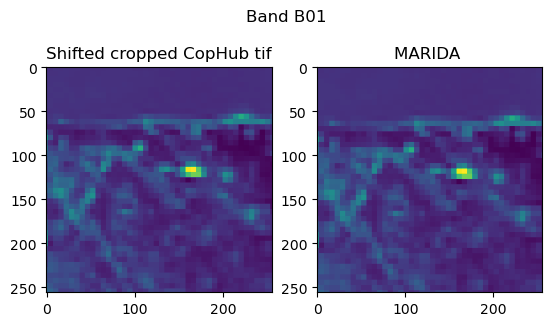

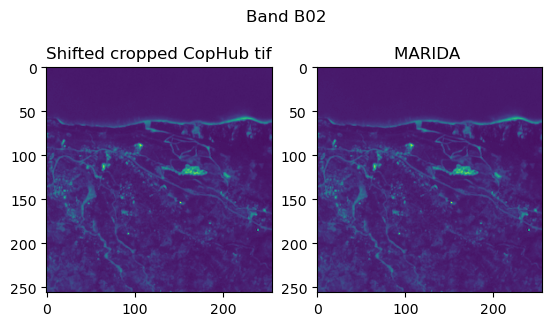

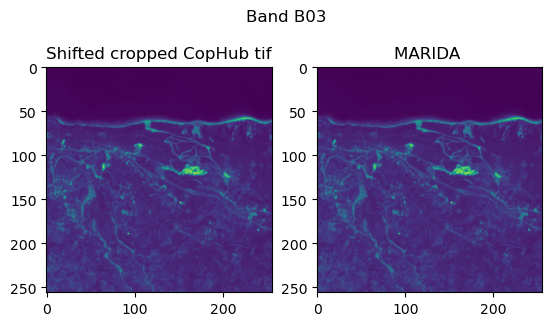

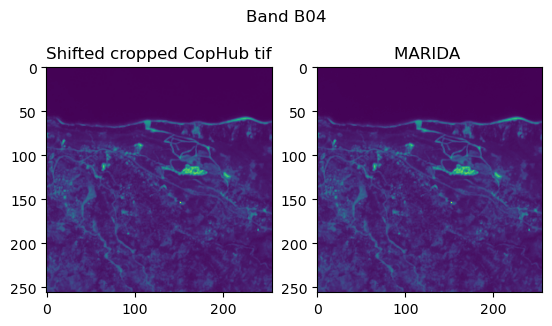

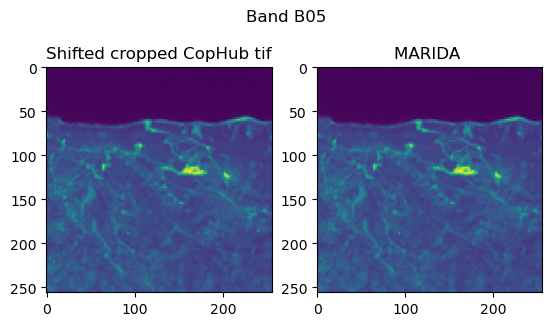

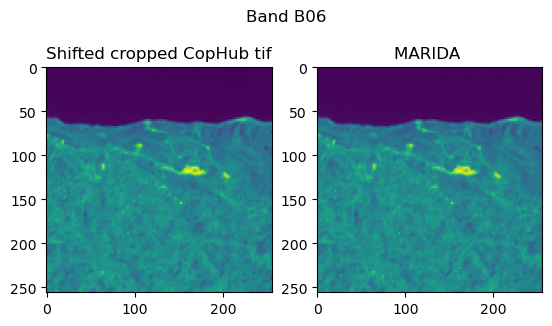

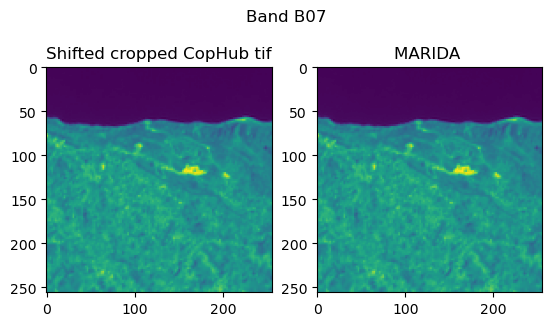

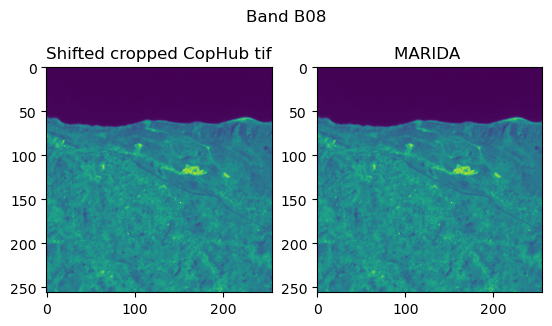

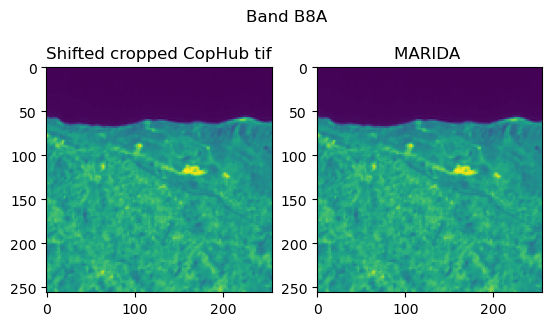

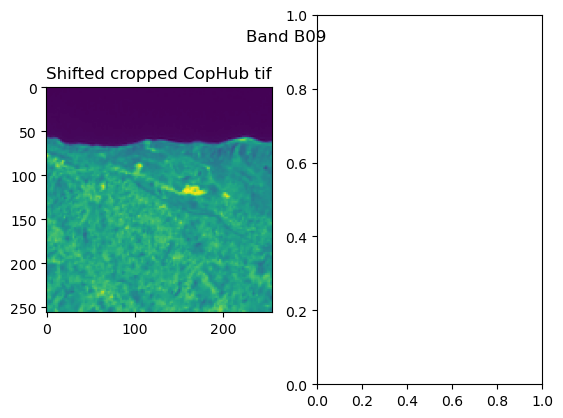

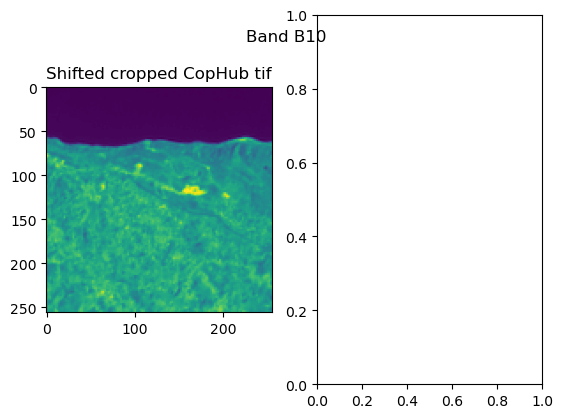

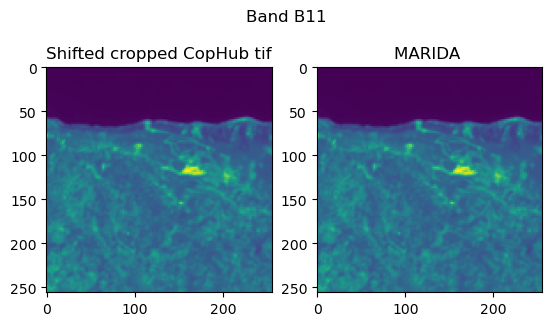

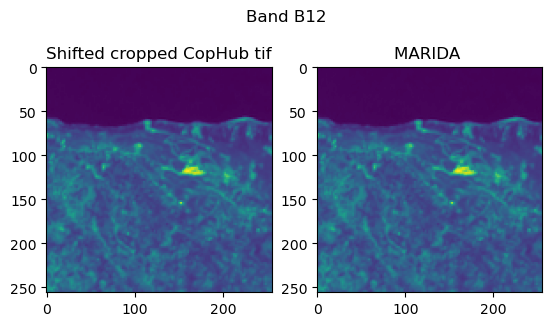

In [5]:
img_shifted_cropped_cop_hub_path = os.path.join(path_generated_tif)
img_shifted_cropped_cop_hub, _ = acquire_data(img_shifted_cropped_cop_hub_path)
print(img_shifted_cropped_cop_hub.shape)
j = 0
for i in range(13):
    fig, ax = plt.subplots(1, 2)
    fig.suptitle(f"Band {BAND_NAMES_IN_COPERNICUS_HUB[i]}", fontsize=12, y=0.85)
    
    ax[0].set_title("Shifted cropped CopHub tif")
    ax[0].imshow(img_shifted_cropped_cop_hub[:, :, i] / img_shifted_cropped_cop_hub[:, :, i].max())
    
    if i == 9 or i == 10:
        pass
    else:
        ax[1].set_title("MARIDA ")
        ax[1].imshow(img_marida[:, :, j] / img_marida[:, :, j].max())
        j += 1
    